Random Forest Algorithm with Python and Scikit-Learn
-------------------------------------------------------------------------------

Random forest is a type of supervised machine learning algorithm based on **ensemble learning**. Ensemble learning is a type of learning where you join different types of algorithms or same algorithm multiple times to form a more powerful prediction model. The random forest algorithm combines multiple algorithm of the same type i.e. multiple decision trees, resulting in a forest of trees, hence the name "Random Forest". The random forest algorithm can be used for both regression and classification tasks.

How the Random Forest Algorithm Works
------------------------------------------------------------

The following are the basic steps involved in performing the random forest algorithm:

1> Pick N random records from the dataset, **call it Bootstraped Dataset**. <br>
2> Build a decision tree based on these N records. <br>
3> Choose the number of trees you want in your algorithm 
   and repeat steps 1 and 2. <br>
4> In case of a **regression problem**, <font color='green'> for a new record, each tree in the forest predicts a value for Y (output). The final value can be calculated by taking the average of all the values predicted by all the trees in forest.</font> <br> 
Or, in case of a **classification problem**, <font color='green'> each tree in the forest predicts the category to which the new record belongs. Finally, the new record is assigned to the category that wins the majority vote. </font>

<hr>

Q. <font color='red'><b> What does Bagging mean ?</b></font>

Q. <font color='red'><b> Is their something like "Out of Bag" Error ?</b></font>
<hr>

Advantages of using Random Forest
-----------------------------------------------------
As with any algorithm, there are advantages and disadvantages to using it. In the next two sections we'll take a look at the pros and cons of using random forest for classification and regression.

1> The random forest algorithm is not biased, since, there are multiple trees and each tree is trained on a subset of data. Basically, the random forest algorithm relies on the power of "the crowd"; therefore the overall biasedness of the algorithm is reduced.

2> This algorithm is very stable. Even if a new data point is introduced in the dataset the overall algorithm is not affected much since new data may impact one tree, but it is very hard for it to impact all the trees.

3> The random forest algorithm works well when you have both categorical and numerical features. 

4> The random forest algorithm also works well when data has missing values or it has not been scaled well.

Disadvantages of using Random Forest
---------------------------------------------------------
1> A major disadvantage of random forests lies in their complexity. They required much more computational resources, owing to the large number of decision trees joined together.

2> Due to their complexity, they require much more time to train; than other comparable algorithms.

1> Using Random Forest for Regression
----------------------------------------------------------

<font color='red'><u>Problem Definition</u> : The problem here is to <b>predict the gas consumption</b> (in millions of gallons) in 48 of the US states based on petrol tax (in cents), per capita income (dollars), paved highways (in miles) and the proportion of population with the driving license. </font>

In [3]:
# Steps to upload any dataset into your Colab NB :
# step 1 : First Download the dataset to your local PC. 
#          The link for downloading our first dataset for practicing is https://drive.google.com/open?id=1CSP3e6k-04UZZoQd_6NP_wUSts4wNLIc 
# step 2 : Run the below code and select the (above downloaded) dataset. 

from google.colab import files
files.upload()

Saving petrol_consumption.csv to petrol_consumption.csv


{'petrol_consumption.csv': b'Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption\r\n9.00,3571,1976,0.5250,541\r\n9.00,4092,1250,0.5720,524\r\n9.00,3865,1586,0.5800,561\r\n7.50,4870,2351,0.5290,414\r\n8.00,4399,431,0.5440,410\r\n10.00,5342,1333,0.5710,457\r\n8.00,5319,11868,0.4510,344\r\n8.00,5126,2138,0.5530,467\r\n8.00,4447,8577,0.5290,464\r\n7.00,4512,8507,0.5520,498\r\n8.00,4391,5939,0.5300,580\r\n7.50,5126,14186,0.5250,471\r\n7.00,4817,6930,0.5740,525\r\n7.00,4207,6580,0.5450,508\r\n7.00,4332,8159,0.6080,566\r\n7.00,4318,10340,0.5860,635\r\n7.00,4206,8508,0.5720,603\r\n7.00,3718,4725,0.5400,714\r\n7.00,4716,5915,0.7240,865\r\n8.50,4341,6010,0.6770,640\r\n7.00,4593,7834,0.6630,649\r\n8.00,4983,602,0.6020,540\r\n9.00,4897,2449,0.5110,464\r\n9.00,4258,4686,0.5170,547\r\n8.50,4574,2619,0.5510,460\r\n9.00,3721,4746,0.5440,566\r\n8.00,3448,5399,0.5480,577\r\n7.50,3846,9061,0.5790,631\r\n8.00,4188,5975,0.5630,574\r\n9.00,3601,4650,0.4930,534\r\n7.00,36

In [15]:
#Import Libraries
import pandas as pd  
import numpy as np  

dataset = pd.read_csv('petrol_consumption.csv')  
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [16]:
## mean of target var. so that I can compare later with RMSE
dataset['Petrol_Consumption'].mean()

## RMSE < 10% of mean of target var

576.7708333333334

In [17]:
# Preparing the Data
# divide the data into attributes and labels
X = dataset.drop('Petrol_Consumption', axis=1)  
y = dataset['Petrol_Consumption']  

# dividing data into training and testing set
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)  

# Training and Making Predictions
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=20, random_state=0)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test)  

# The RandomForestRegressor class of the sklearn.ensemble library
# is used to solve regression problems via random forest. 
# The most important parameter of the RandomForestRegressor class 
# is the n_estimators parameter. 
# This parameter defines the number of trees in the random forest.

# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 51.76500000000001
Mean Squared Error: 4216.166749999999
Root Mean Squared Error: 64.93201637097064


With 20 trees, the root mean squared error is ___ which is (less than/ not less than) 10 percent of the average petrol consumption ( i.e. 10% of 576.77 = 57.67). This indicate, that our ML model is (fine/not fine).

In [18]:
# If the number of estimators is changed to 200, the results are as follows:
regressor = RandomForestRegressor(n_estimators=200, random_state=0)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test)  

# Evaluating the Algorithm
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 48.124500000000005
Mean Squared Error: 3497.802072500001
Root Mean Squared Error: 59.142219035981405


In [19]:
# If the number of estimators is changed to 200, the results are as follows:
regressor = RandomForestRegressor(n_estimators=220, random_state=0)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test)  

# Evaluating the Algorithm
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 48.297272727272734
Mean Squared Error: 3508.4540165289254
Root Mean Squared Error: 59.23220421805122


In [20]:
# If the number of estimators is changed to 200, the results are as follows:
regressor = RandomForestRegressor(n_estimators=250, random_state=0)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test)  

# Evaluating the Algorithm
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 47.988800000000005
Mean Squared Error: 3483.7623904000016
Root Mean Squared Error: 59.02340544563658


In [23]:
# If the number of estimators is changed to 200, the results are as follows:
regressor = RandomForestRegressor(n_estimators=400, random_state=0)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test)  

# Evaluating the Algorithm
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 47.91199999999999
Mean Squared Error: 3481.401009999999
Root Mean Squared Error: 59.0033982919628


<font color='green'><b>Analysis :</b></font> With 200 trees, the root mean squared error is 59.14 which is close to 10 percent of the average petrol consumption (i.e. 10% of 576.77 = 57.67). 

<font color='red'>The LEARNER's are expected to try <b> n_estimators</b> values of 220 and 250. </font> 

<b>Do you observe any difference ? </b><br>
<font color='green'>If yes then please share on the group chat. This would help your peers in learning better. </font>

2: Using Random Forest for Classification
------------------------------------------------------------

<font color='red'><b>Problem Definition</b> : The task here is to predict whether a bank currency note is <u>authentic</u> or <u>not</u> based on four attributes i.e. variance of the image wavelet transformed image, skewness, entropy, and curtosis of the image.</font>

In [13]:
# Steps to upload any dataset into your Colab NB :
# step 1 : First Download the dataset to your local PC. 
#          The link for downloading our first dataset for practicing is https://drive.google.com/open?id=19YvsKMdlIZ_bxgJOSg4waIkVTyJ-UYx_
# step 2 : Run the below code and select the (above downloaded) dataset. 

from google.colab import files
files.upload()

Saving bill_authentication.csv to bill_authentication.csv


{'bill_authentication.csv': b'Variance,Skewness,Curtosis,Entropy,Class\r\n3.6216,8.6661,-2.8073,-0.44699,0\r\n4.5459,8.1674,-2.4586,-1.4621,0\r\n3.866,-2.6383,1.9242,0.10645,0\r\n3.4566,9.5228,-4.0112,-3.5944,0\r\n0.32924,-4.4552,4.5718,-0.9888,0\r\n4.3684,9.6718,-3.9606,-3.1625,0\r\n3.5912,3.0129,0.72888,0.56421,0\r\n2.0922,-6.81,8.4636,-0.60216,0\r\n3.2032,5.7588,-0.75345,-0.61251,0\r\n1.5356,9.1772,-2.2718,-0.73535,0\r\n1.2247,8.7779,-2.2135,-0.80647,0\r\n3.9899,-2.7066,2.3946,0.86291,0\r\n1.8993,7.6625,0.15394,-3.1108,0\r\n-1.5768,10.843,2.5462,-2.9362,0\r\n3.404,8.7261,-2.9915,-0.57242,0\r\n4.6765,-3.3895,3.4896,1.4771,0\r\n2.6719,3.0646,0.37158,0.58619,0\r\n0.80355,2.8473,4.3439,0.6017,0\r\n1.4479,-4.8794,8.3428,-2.1086,0\r\n5.2423,11.0272,-4.353,-4.1013,0\r\n5.7867,7.8902,-2.6196,-0.48708,0\r\n0.3292,-4.4552,4.5718,-0.9888,0\r\n3.9362,10.1622,-3.8235,-4.0172,0\r\n0.93584,8.8855,-1.6831,-1.6599,0\r\n4.4338,9.887,-4.6795,-3.7483,0\r\n0.7057,-5.4981,8.3368,-2.8715,0\r\n1.1432,-3.74

In [24]:
# doing the minimum necessary imports
# more modules would be imported as and when needed

import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

# reading data from CSV file. 
# reading bank currency note data into pandas dataframe.
bankdata = pd.read_csv("bill_authentication.csv")  

# Exploratory Data Analysis
print(bankdata.shape)  
print("------------")
print(bankdata.head()) 

(1372, 5)
------------
   Variance  Skewness  Curtosis  Entropy  Class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


In [29]:
# Data Preprocessing
# Data preprocessing involves 
# (1) Dividing the data into attributes and labels and 
# (2) dividing the data into training and testing sets.

# To divide the data into attributes and labels, do :
X = bankdata.drop('Class', axis=1)  
y = bankdata['Class']  

# the final preprocessing step is to divide data into training and test sets
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.20, 
                                                    random_state=0)


# Training the Algorithm.
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=20, random_state=0)  
classifier.fit(X_train, y_train)  
y_pred = classifier.predict(X_test)

# Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred)) 
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))

[[155   2]
 [  1 117]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       157
           1       0.98      0.99      0.99       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

0.9890909090909091


In [30]:
# Training the Algorithm.
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10, random_state=0)  
classifier.fit(X_train, y_train)  
y_pred = classifier.predict(X_test)

# Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred)) 
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))

[[155   2]
 [  1 117]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       157
           1       0.98      0.99      0.99       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

0.9890909090909091


In [31]:
# Training the Algorithm.
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=50, random_state=0)  
classifier.fit(X_train, y_train)  
y_pred = classifier.predict(X_test)

# Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred)) 
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))

[[155   2]
 [  1 117]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       157
           1       0.98      0.99      0.99       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

0.9890909090909091


In [37]:
# Training the Algorithm.
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=30, random_state=0)  
classifier.fit(X_train, y_train)  
y_pred = classifier.predict(X_test)

# Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred)) 
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))

[[155   2]
 [  1 117]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       157
           1       0.98      0.99      0.99       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

0.9890909090909091


<font color='green'><b>Analysis</b></font> : The accuracy achieved for by our random forest classifier with 20 trees is 99% ( which is great !!). 

<font color='red'>The LEARNER's are expected to try n_estimators values of 10 and 50. </font> 

<b>Do you observe any difference ?</b> <br>
<font color='green'>If yes then please share on the group chat. This would help your peers in learning better. </font>

Q> <font color='red'>How do I get the best value of the estimators ? </font>
**[remember : its not always best to have higher no. of estimators?**] <br>[<i><font color='green'> Becoz higher no. of estimators means more trees , which means more time.</font></i> ] <br>

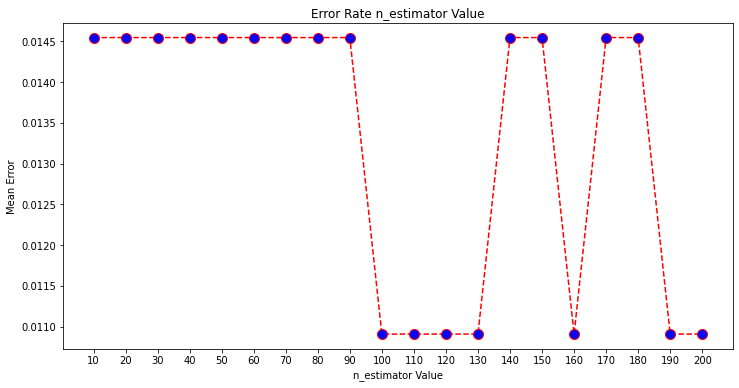

In [43]:
# follow hints to answer above Qn. of finding the best value of estimators.
# loop through values from 10 to 200, step by 10. 
# like -> for n_estimator in range(10, 201, 10):
# use n_estimator as variable in RandomForestClassifier 
# or  RandomForestRegressor something like this :

error = []   # declaring a list to hold performance values
# Calculating error for K values between 10 and 200, 
# stepping by 10 units each time
for i in range(10, 201, 10):  
    classifier = RandomForestClassifier(n_estimators = i,random_state=100)
    classifier.fit(X_train, y_train)
    pred_i = classifier.predict(X_test)
    error.append(np.mean(pred_i != y_test))   
    # see below expln for np.mean()

#-- here != compares 2 ndarray objects 
#-- return value is array of true/false i.e 0/1 values, 
#-- of which we are finding the mean values.
    
#-- The above script executes a loop from 10 to 200, 
#   in steps of 10 -> 10, 20, 30,..... upto 200 
#-- In each iteration the mean error is calculated 
#-- and the result is appended to the error list.

#-- Now please plot the error values vs. n_estimator
plt.figure(figsize=(12, 6))  
plt.plot(range(10, 201, 10), error, color='red', 
         linestyle='dashed', marker='o', markerfacecolor='blue', 
         markersize=10)
plt.xticks(np.arange(10, 201, step=10))
plt.title('Error Rate n_estimator Value')  
plt.xlabel('n_estimator Value')  
plt.ylabel('Mean Error');    